In [76]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import env
import wrangle_zillow
import wrangle_mall

# Exercise 1

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [11]:
# define SQL query and use function to connect to the Codeup SQL server
iris_sql_query =  '''
                    select * from measurements
                    join species using(species_id);
                    '''

def query_iris_data():
    '''
    This function uses the get_connection function to connect to the iris database and returns the iris_sql_query read into a pandas dataframe
    '''
    return pd.read_sql(iris_sql_query,wrangle_zillow.get_connection('iris_db'))

In [12]:
# use a function to pull in iris data
df = query_iris_data()
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


## Exercise 1a.

Choose features other than the ones used in the lesson.

In [25]:
# select the features to use
X = df[['petal_width', 'sepal_width']]
X.head(2)

,petal_width,sepal_width
0,0.2,3.5
1,0.2,3.0


array([[<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'sepal_width'}>]], dtype=object)

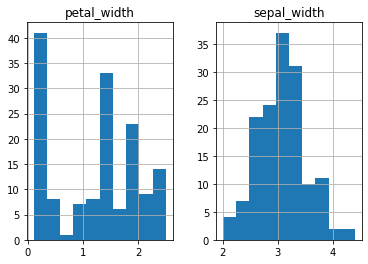

In [26]:
# visualize distribution
X.hist()

In [27]:
# scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [28]:
X_scaled.head()

,petal_width,sepal_width
0,-1.315444,1.019004
1,-1.315444,-0.131979
2,-1.315444,0.328414
3,-1.315444,0.098217
4,-1.315444,1.249201


In [29]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [30]:
# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [32]:
df.sample(10)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster
22,1,23,4.6,3.6,1.0,0.2,setosa,0
14,1,15,5.8,4.0,1.2,0.2,setosa,0
81,2,82,5.5,2.4,3.7,1.0,versicolor,1
126,3,127,6.2,2.8,4.8,1.8,virginica,2
123,3,124,6.3,2.7,4.9,1.8,virginica,1
58,2,59,6.6,2.9,4.6,1.3,versicolor,1
97,2,98,6.2,2.9,4.3,1.3,versicolor,1
110,3,111,6.5,3.2,5.1,2.0,virginica,2
148,3,149,6.2,3.4,5.4,2.3,virginica,2
62,2,63,6.0,2.2,4.0,1.0,versicolor,1


## Exercise 1b.

Visualize the results of your clustering.

In [41]:
# check cluster centers
kmeans.cluster_centers_

array([[-1.25634413,  0.90625492],
       [ 0.18974112, -1.04776227],
       [ 0.96059584,  0.06891952]])

In [42]:
# create dataframe of cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,-1.256344,0.906255
1,0.189741,-1.047762
2,0.960596,0.068920


<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

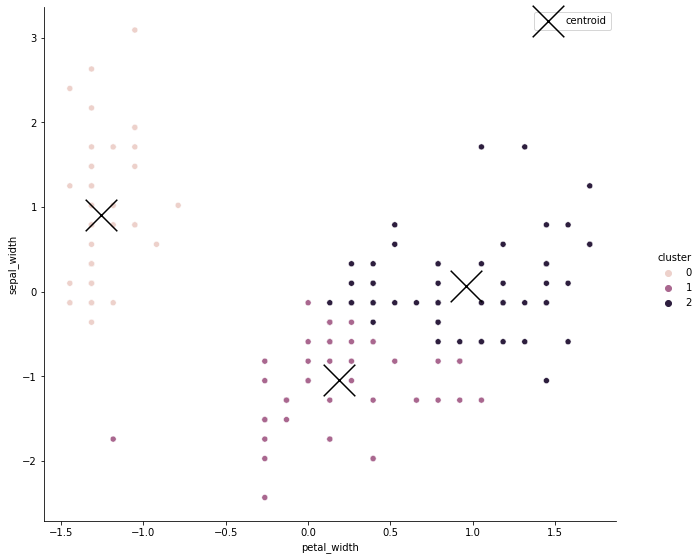

In [51]:
# visualize clustering results

sns.relplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

centroids.plot.scatter(x='petal_width', y='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid', figsize=(10, 8))

## Exercise 1c.

Use the elbow method to visually select a good value for k.

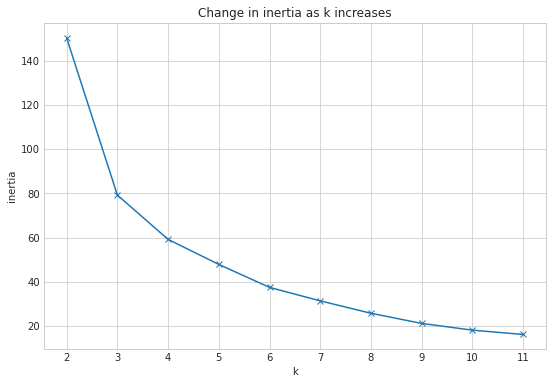

In [52]:
# use elbow method to see what might be a good value for k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**Using this visualization, I might determine to use a k of 3 or 4 since the slope starts tapering off after that**

## Exercise 1d

Repeat the clustering, this time with 3 different features.

In [53]:
# select the features to use
X = df[['petal_width', 'petal_length', 'sepal_width']]
X.head(2)

,petal_width,petal_length,sepal_width
0,0.2,1.4,3.5
1,0.2,1.4,3.0


In [54]:
# scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [55]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [56]:
# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster2'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [57]:
df.sample(10)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster,cluster2
14,1,15,5.8,4.0,1.2,0.2,setosa,0,1
50,2,51,7.0,3.2,4.7,1.4,versicolor,2,0
93,2,94,5.0,2.3,3.3,1.0,versicolor,1,2
12,1,13,4.8,3.0,1.4,0.1,setosa,0,1
111,3,112,6.4,2.7,5.3,1.9,virginica,1,2
59,2,60,5.2,2.7,3.9,1.4,versicolor,1,2
117,3,118,7.7,3.8,6.7,2.2,virginica,2,0
69,2,70,5.6,2.5,3.9,1.1,versicolor,1,2
24,1,25,4.8,3.4,1.9,0.2,setosa,0,1
122,3,123,7.7,2.8,6.7,2.0,virginica,2,0


In [58]:
# create dataframe of cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,petal_length,sepal_width
0,1.076828,1.004935,0.118234
1,-1.256344,-1.303108,0.906255
2,0.218669,0.320460,-0.906278


In [59]:
pd.crosstab(df.cluster, df.cluster2)

cluster2,0,1,2
cluster,,,
0,0,49,0
1,0,0,46
2,46,0,9


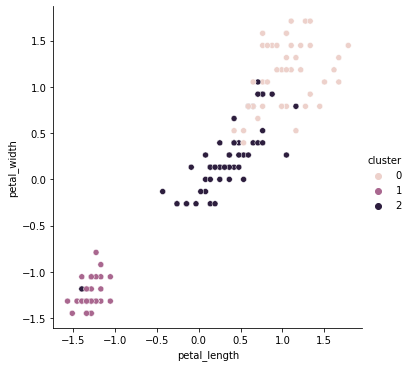

In [73]:
# visualize clustering results

sns.relplot(data = X_scaled, x='petal_length', y='petal_width', hue='cluster')

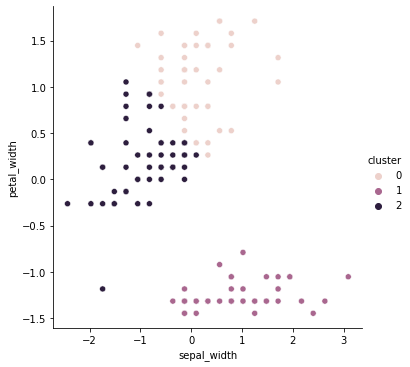

In [74]:
# visualize clustering results

sns.relplot(data = X_scaled, x='sepal_width', y='petal_width', hue='cluster')

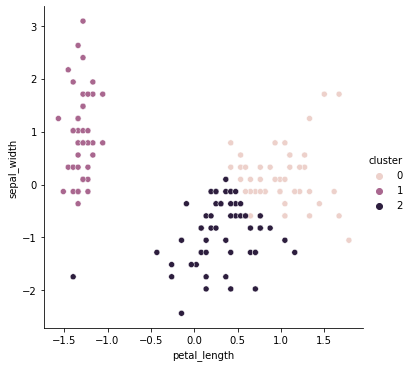

In [75]:
# visualize clustering results

sns.relplot(data = X_scaled, x='petal_length', y='sepal_width', hue='cluster')

# Exercise 2

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [77]:
# use a function to pull in mall customers data
df = wrangle_mall.get_mall_customers_data()
df.head(2)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81


In [78]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>]], dtype=object)

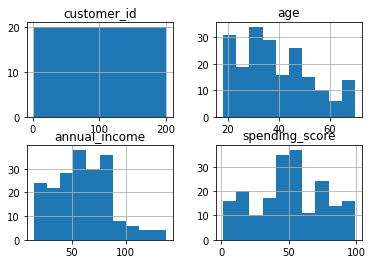

In [79]:
# visualize distributions
df.hist()

In [81]:
# select the features to use
X = df[['age','annual_income','spending_score']]

In [82]:
# scale data
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [83]:
# check first few rows of dataframe
X_scaled.head(3)

,age,annual_income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [84]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int32)

In [86]:
# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

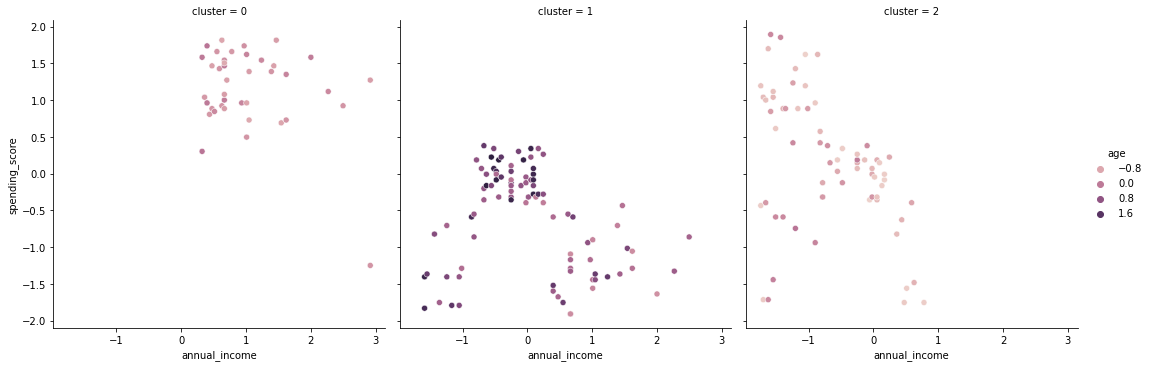

In [89]:
# visualize clustering results

sns.relplot(data = X_scaled, x='annual_income', y='spending_score', hue='age', col='cluster')

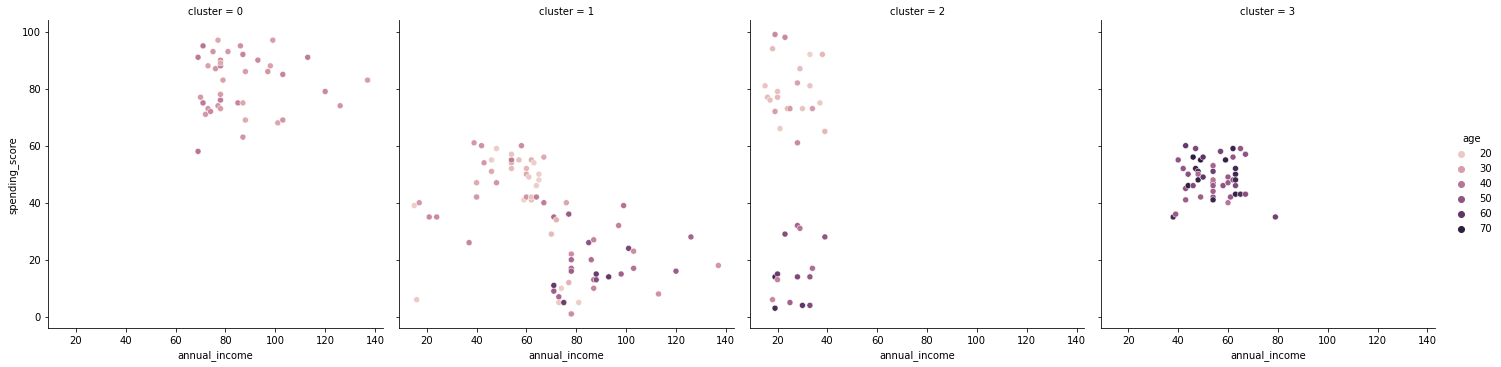

In [100]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=4, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results

sns.relplot(data = df, x='annual_income', y='spending_score', hue=df.age, col='cluster')

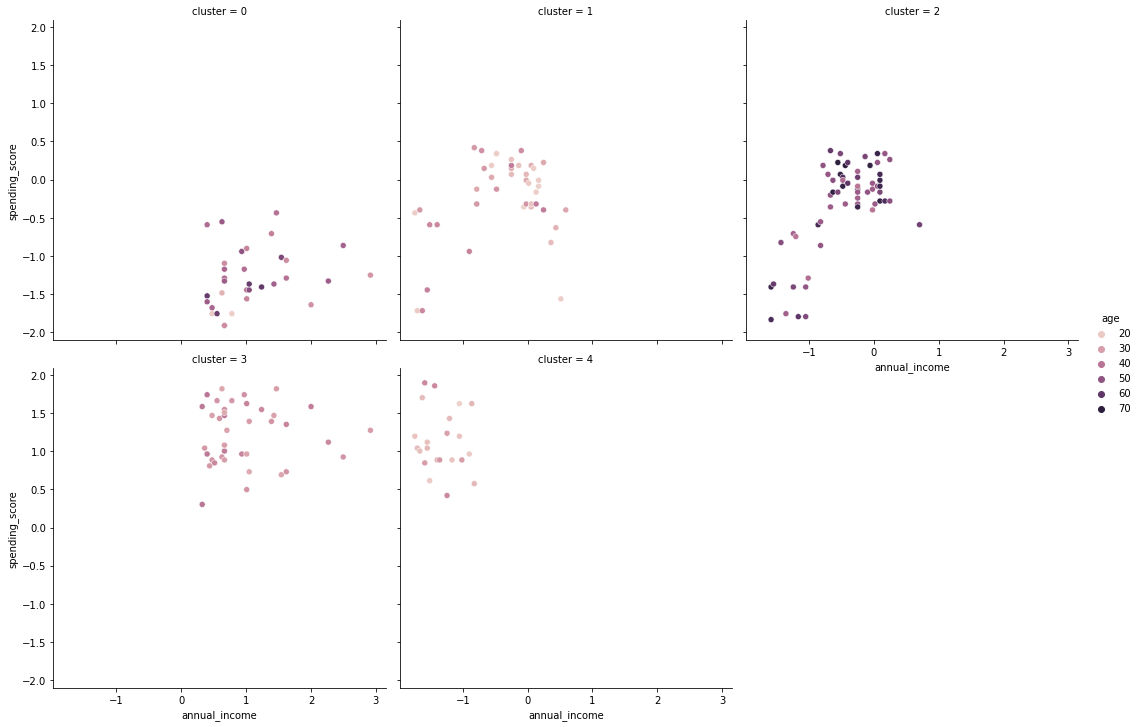

In [101]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=5, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results

sns.relplot(data = X_scaled, x='annual_income', y='spending_score', hue=df.age, col='cluster', col_wrap=3)

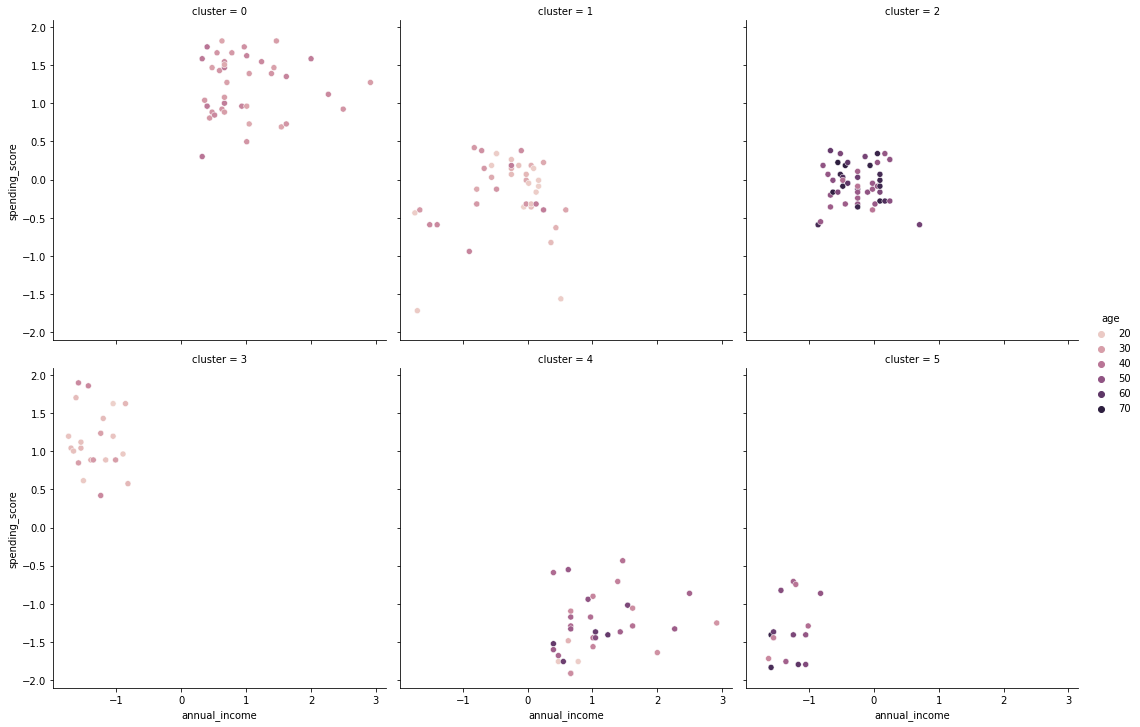

In [102]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=6, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results

sns.relplot(data = X_scaled, x='annual_income', y='spending_score', hue=df.age, col='cluster', col_wrap=3)

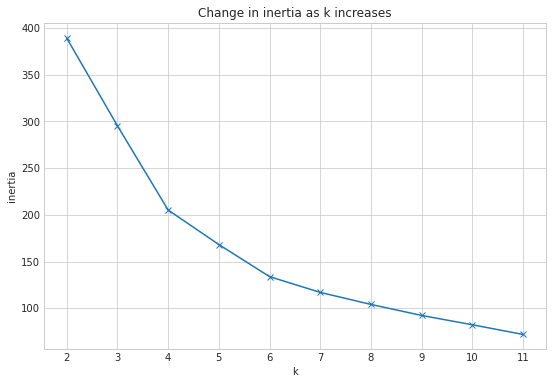

In [85]:
# plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**Plotting inertia vs k confirms that k of 4 - 6 is optimal as the slope starts leveling off after that**

# Exercise 3

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

## Exercise 3a

Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [136]:
# read in data from google sheets
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&gid=0')
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


## Exercise 3b

Visualize the data and guess the number and shape of the clusters.

In [115]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       800 non-null    float64
 1   y       800 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

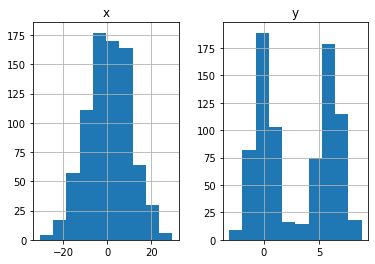

In [116]:
# check distribution of numerical values
df.hist()

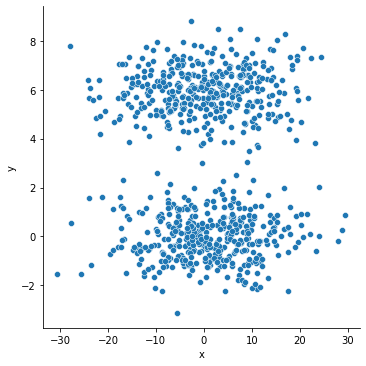

In [118]:
# visualize data
sns.relplot(data=df, x='x', y='y')

**Visualizing the data clearly shows 2 clusters, one with y less than 3 and one with y greater than 3**

## Exercise 3c

Implement the KMeans algorithm on unscaled data and visualize the clusters.

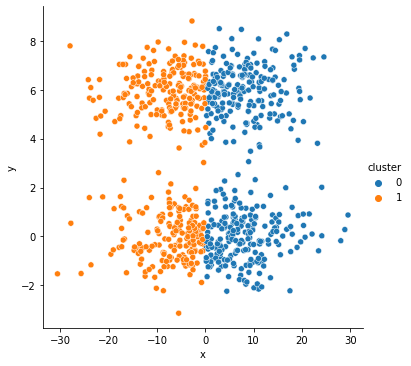

In [137]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=2, random_state = 369)

# fit the thing
kmeans.fit(df)

# Use the thing to predict
kmeans.predict(df)

# create a new column with the predicted cluster in the original dataframe
df['cluster'] = kmeans.predict(df)

# visualize clustering results

sns.relplot(data = df, x='x', y='y', hue='cluster')

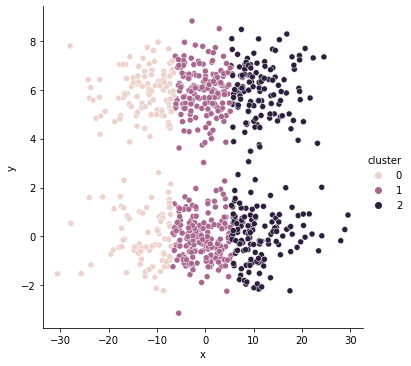

In [141]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 369)

# fit the thing
kmeans.fit(df)

# Use the thing to predict
kmeans.predict(df)

# create a new column with the predicted cluster in the original dataframe
df['cluster'] = kmeans.predict(df)

# visualize clustering results
sns.relplot(data = df, x='x', y='y', hue='cluster')

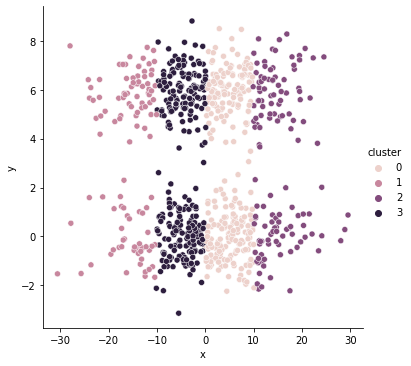

In [142]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=4, random_state = 369)

# fit the thing
kmeans.fit(df)

# Use the thing to predict
kmeans.predict(df)

# create a new column with the predicted cluster in the original dataframe
df['cluster'] = kmeans.predict(df)

# visualize clustering results
sns.relplot(data = df, x='x', y='y', hue='cluster')

In [138]:
df2 = df.drop(columns='cluster')
df2.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [139]:
# scale data
scaler = StandardScaler().fit(df2)
X_scaled = pd.DataFrame(scaler.transform(df2), columns= df2.columns).set_index([df2.index.values])

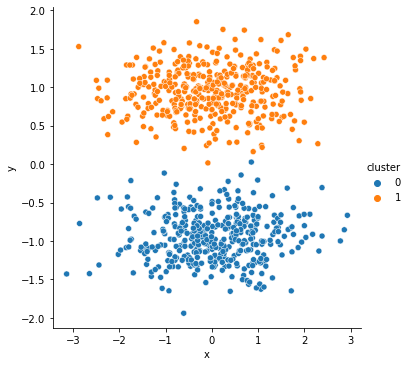

In [143]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=2, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results
sns.relplot(data = X_scaled, x='x', y='y', hue='cluster')

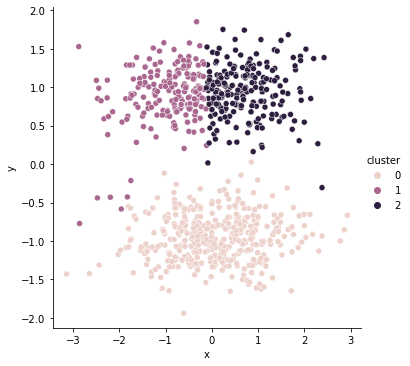

In [144]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results
sns.relplot(data = X_scaled, x='x', y='y', hue='cluster')

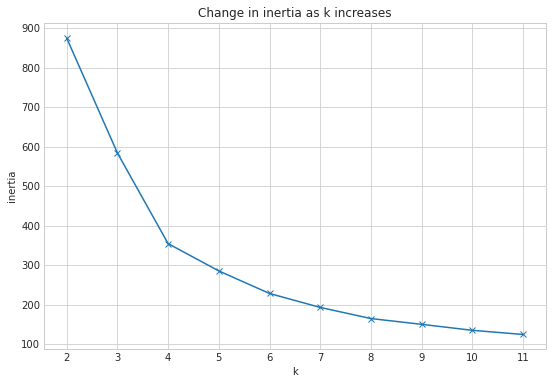

In [111]:
# plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

**Using the elbow method, it looks like the optimal values of k would be 4 or 5**

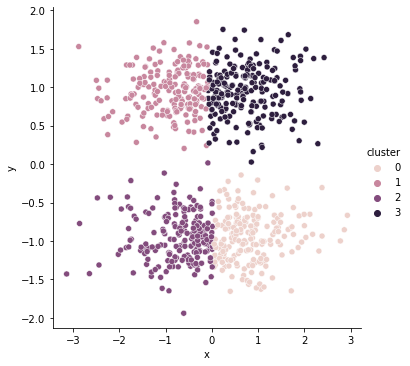

In [112]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=4, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results

sns.relplot(data = X_scaled, x='x', y='y', hue='cluster')

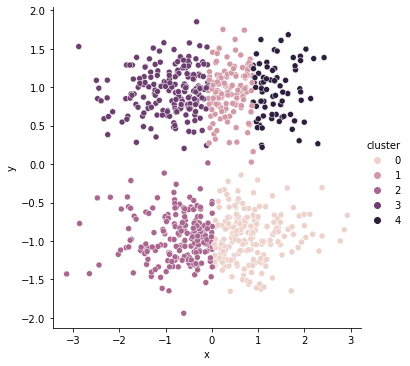

In [113]:
# use KMeans to create cluster

# define the thing
kmeans = KMeans(n_clusters=5, random_state = 369)

# fit the thing
kmeans.fit(X_scaled)

# Use the thing to predict
kmeans.predict(X_scaled)

# create a new column with the predicted cluster in the original and scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# visualize clustering results

sns.relplot(data = X_scaled, x='x', y='y', hue='cluster')

**Takeaways**

**Unscaled data can produce different results than scaled data. Visually, it was easy to see two clusters split horizontally but because of scaling differences on the x and y axis, the model split the data vertically. This made it clear how important scaling is for getting accurate results**